<a href="https://colab.research.google.com/github/r-matsuzaka/practice-elements-of-programming/blob/main/colab/chapter_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter13 Dynamic Programming

In [1]:
%%capture
!pip install yapf

from IPython.core.magic import register_cell_magic
from yapf.yapflib.yapf_api import FormatCode


@register_cell_magic
def fmt(line, cell):
   """
   My formatter cell magic comannd.
   Please install yapf before using this magic command.
   """
   print(FormatCode(cell, style_config='pep8')[0])

## Fibonacci number
- Recursion
- Dynamic programming

In [2]:
def fibonacci_dp(n, cache={}):
  if n <= 1:
    return n

  elif n not in cache:
    cache[n] = fibonacci_dp(n-1) + fibonacci_dp(n-2)
  return cache[n]

fibonacci_dp(10)

55

In [3]:
def fibonacci(n):
  if n <= 1:
    return n

  f_minus_2, f_minus_1 = 0, 1
  for _ in range(1, n):
    f = f_minus_2 + f_minus_1
    f_minus_2, f_minus_1 = f_minus_1, f
  return f_minus_1

fibonacci(10)

55

In [4]:
# %%fmt
import time
import math
import numpy as np
import matplotlib.pyplot as plt


def time_cost_viz(f, nmax):

    time_counts = []

    ids = list(range(nmax))
    start_time = time.perf_counter()

    for id in ids:
        start_time = time.perf_counter()
        f(id)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_counts.append(math.log10(elapsed_time))

    x = np.array(ids)
    y = np.array(time_counts)
    plt.plot(x, y)

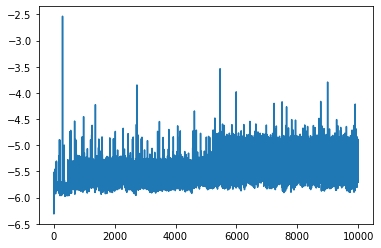

In [5]:
time_cost_viz(fibonacci_dp, 10000)

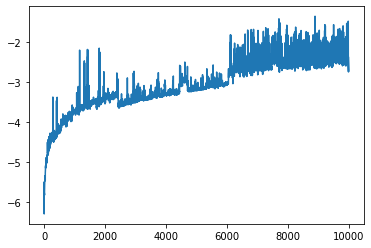

In [6]:
time_cost_viz(fibonacci, 10000)

## Shortest path problem

- Dynamic programming
- Reinforcement learning
- Genetic algorithm
- Dijkstra's algorithm

In [7]:
%%capture
!pip install networkx 

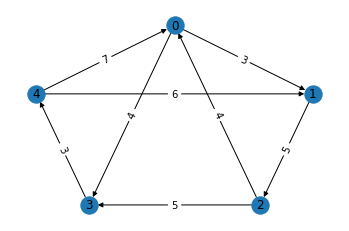

In [8]:
#%%fmt
import math
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

pos = {
    0: (0, 1),
    1: (math.cos(math.radians(18)), math.sin(math.radians(18))),
    2: (math.sin(math.radians(36)), -math.cos(math.radians(36))),
    3: (-math.sin(math.radians(36)), -math.cos(math.radians(36))),
    4: (-math.cos(math.radians(18)), math.sin(math.radians(18))),
}

# path = (start, end, cost)
paths = [(0, 1, 3), (2, 0, 4), (0, 3, 4), (4, 0, 7), (1, 2, 5), (4, 1, 6),
         (2, 3, 5), (3, 4, 3)]
G.add_weighted_edges_from(paths)

nx.draw_networkx_labels(G, pos)

# Draw only weight attribute as edge label.
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Finish drawing.
nx.draw(G, pos)

# Display with Matplotlib.
plt.axis('off')
plt.show()

### Dijkstra's algorithm

In [9]:
%%time
nx.dijkstra_path(G, 0, 4)

CPU times: user 56 µs, sys: 3 µs, total: 59 µs
Wall time: 62.9 µs


[0, 3, 4]

### Bellman–Ford algorithm

In [10]:
%%capture
!pip install bellmanford
import bellmanford as bf

In [11]:
%%time
length, nodes, negative_cycle = bf.bellman_ford(G, source=0, target=4, weight='weight')
nodes

CPU times: user 150 µs, sys: 8 µs, total: 158 µs
Wall time: 163 µs


### Genetic algorithm

- Traveling salesman problem
- Shortest path problem

In [12]:
%%capture
!pip install simpleai

In [13]:
import random
import copy
from simpleai.search import SearchProblem
from simpleai.search.local import genetic

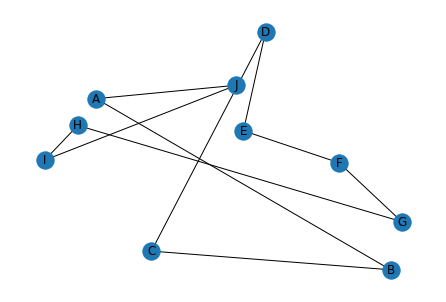

In [14]:
# グラフの初期化
G2 = nx.Graph()

# ノード
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# ノードの位置
pos ={
  "A": (17, 72),
  "B": (97, 8),
  "C": (32, 15),
  "D": (63, 97),
  "E": (57, 60),
  "F": (83, 48),
  "G": (100, 26),
  "H": (12, 62),
  "I": (3, 49),
  "J": (55, 77)
}

# 経路
route = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"), ("F", "G"), ("G", "H"), ("H", "I"), ("I", "J"), ("J", "A")]
G2.add_edges_from(route)

# 描画
nx.draw(G2, pos=pos, with_labels=True)

In [15]:
def toGene(route):

  destinations = list(copy.deepcopy(G2.nodes))
  gene = []

  for edge in route:
    index = destinations.index(edge[0])
    destinations.pop(index)
    gene.append(index)

  return gene

gene = toGene(route)
print(gene)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
# 個体（遺伝子）から経路へ
def toRoute(gene):
  destinations = list(copy.deepcopy(G2.nodes))
  nodes = []

  for index in gene:
    node = destinations[index]
    destinations.pop(index)
    nodes.append(node)

  route = []

  for i, node in enumerate(nodes):
    edge = ((nodes[i], nodes[(i+1) % len(nodes)]))
    route.append(edge)

  return route

route = toRoute(gene)
print(route)

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'A')]


In [17]:
# ランダムに個体を生成
def randomGene():
    destinations = list(copy.deepcopy(G2.nodes))
    gene = []

    for i in range(len(destinations)):
      node = random.choice(destinations)
      index = destinations.index(node)
      destinations.pop(index)
      gene.append(index)

    return gene

gene = randomGene()
print(gene)
print(toRoute(gene))

[4, 4, 7, 1, 3, 0, 3, 0, 1, 0]
[('E', 'F'), ('F', 'J'), ('J', 'B'), ('B', 'G'), ('G', 'A'), ('A', 'I'), ('I', 'C'), ('C', 'H'), ('H', 'D'), ('D', 'E')]


In [18]:
# 経路距離
def distance(route):
  d = 0

  for edge in route:
    pos_head = np.array(pos[edge[0]])
    pos_tail = np.array(pos[edge[1]])
    d += np.linalg.norm(pos_tail - pos_head)

  return d

d = distance(route)
print(f"distance={d}")

distance=557.6889363201603


In [19]:
class TSProblem(SearchProblem):

    def value(self, state):
      route = toRoute(state)
      value = -1 * distance(route)

      #--------------------
      # 途中経過の出力
      global max_state
      global max_value

      if max_value < value:
        max_state = state
        max_value = value
        print(f"max state: {max_state}({max_value:.3f})")
        #--------------------

      return value

    def generate_random_state(self):
      gene = randomGene()
      return gene  

    def crossover(self, state1, state2):

      child = []
      index = np.random.randint(0, len(state1))
      for i in range(0, index):
        child.append(state1[i])

      for i in range(index, len(state2)):
        child.append(state2[i])

      return child

    def mutate(self, state):
      child = list(copy.deepcopy(state))

      index = np.random.randint(0, len(child))
      max = len(child) - index
      child[index] = np.random.randint(0, max)

      return child

START = toGene(route)
max_state = START
max_value = -1000
problem = TSProblem(initial_state=START)
result = genetic(problem, population_size=1000, mutation_chance=0.4, iterations_limit=200)

max state: [0, 2, 2, 0, 3, 2, 1, 2, 1, 0](-582.026)
max state: [9, 3, 0, 4, 0, 4, 0, 2, 0, 0](-499.348)
max state: [8, 7, 0, 2, 4, 2, 2, 0, 1, 0](-476.835)
max state: [3, 5, 6, 5, 0, 2, 1, 0, 0, 0](-469.590)
max state: [0, 2, 4, 3, 5, 2, 0, 0, 1, 0](-420.309)
max state: [7, 3, 7, 3, 3, 2, 2, 1, 1, 0](-417.684)
max state: [6, 5, 1, 1, 4, 0, 2, 0, 0, 0](-402.822)
max state: [1, 1, 5, 5, 0, 4, 1, 1, 0, 0](-394.507)
max state: [1, 5, 4, 6, 2, 2, 3, 0, 1, 0](-355.056)
max state: [9, 0, 6, 6, 1, 4, 0, 2, 1, 0](-327.178)
max state: [9, 4, 0, 5, 5, 1, 0, 2, 1, 0](-316.450)


[('F', 'G'), ('G', 'B'), ('B', 'D'), ('D', 'E'), ('E', 'C'), ('C', 'I'), ('I', 'H'), ('H', 'A'), ('A', 'J'), ('J', 'F')]


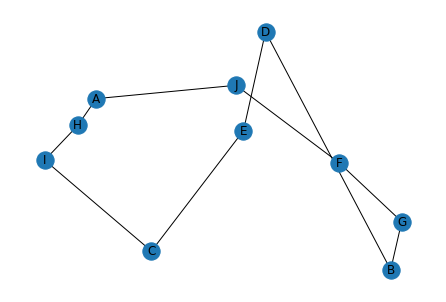

In [20]:
route = toRoute(result.state)
print(route)

# グラフの初期化
G2.clear()

# ノードの設定
G2.add_nodes_from(nodes)

# 経路の設定
G2.add_edges_from(route)

# 描画
nx.draw(G2, pos=pos, with_labels=True)

Reference
- [Elements of Programming Interviews](https://www.amazon.co.jp/Elements-Programming-Interviews-Python-Insiders-ebook/dp/B09QX36QZQ/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=2HMROKFH0ZT5D&keywords=Elements+of+Programming+Interviews&qid=1649566675&s=digital-text&sprefix=elements+of+programming+interviews%2Cdigital-text%2C161&sr=1-1)
- [現場で使える！Python深層強化学習入門 強化学習と深層学習による探索と制御](https://www.amazon.co.jp/%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81Python%E6%B7%B1%E5%B1%A4%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80-%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E3%81%A8%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AB%E3%82%88%E3%82%8B%E6%8E%A2%E7%B4%A2%E3%81%A8%E5%88%B6%E5%BE%A1-%E4%BC%8A%E8%97%A4-%E5%A4%9A%E4%B8%80-ebook/dp/B07SVMGBZN/ref=tmm_kin_swatch_0?_encoding=UTF8&qid=&sr=)
- [プログラミングコンテストチャレンジブック [第2版]　～問題解決のアルゴリズム活用力とコーディングテクニックを鍛える～](https://www.amazon.co.jp/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%B3%E3%83%B3%E3%83%86%E3%82%B9%E3%83%88%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF-%E7%AC%AC2%E7%89%88-%EF%BD%9E%E5%95%8F%E9%A1%8C%E8%A7%A3%E6%B1%BA%E3%81%AE%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E6%B4%BB%E7%94%A8%E5%8A%9B%E3%81%A8%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0%E3%83%86%E3%82%AF%E3%83%8B%E3%83%83%E3%82%AF%E3%82%92%E9%8D%9B%E3%81%88%E3%82%8B%EF%BD%9E-%E7%A7%8B%E8%91%89-%E6%8B%93%E5%93%89-ebook/dp/B00CY9256C/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=26ZVZ2CRNQYWL&keywords=%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF&qid=1649566610&s=digital-text&sprefix=%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF%2Cdigital-text%2C173&sr=1-1)
- [遺伝的アルゴリズム・巡回セールスマン問題](https://mukai-lab.info/pages/classes/artificial_intelligence/chapter11/)
- [Dijkstra 法による最短経路](https://showa-yojyo.github.io/notebook/python-networkx/practice.html#id5)
- [Bellman–Ford algorithm](https://github.com/nelsonuhan/bellmanford)